This lab will analyze data provided by Our World in Data (owid-co2-data.csv). Analysis will be done on CO$_2$ emission metrics for all countries, however, the major focus will be on the scale of the top ten emitters during a time period of 1971-2020.

## Imports

*This code will import each software necessary to graph and compute data.*

In [33]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns 

# set the plotting style 
sns.set_style("whitegrid")

# Plot missing values
import missingno as msno

## Lab introduction

Use the greenhouse gas emission data set owid-co2-data.csv from Our World in Data to describe how the emission levels of the current top 10 CO$_2$ emitters have changed over the last 50 years (1971 - 2020). 



## Import and set up the data set

##### $\rightarrow$ Use Pandas to load the file `owid-co2-data.csv` from https://github.com/owid/co2-data as a `DataFrame`. Name the `DataFrame` `df`.

*This code will pull all of the raw data from Our World in Data's site, and name it df to be used later*

In [34]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv')

Consult the [codebook](https://github.com/owid/co2-data/blob/master/owid-co2-codebook.csv) to see the description of each column.



##### $\rightarrow$ Select the rows corresponding to individual countries 

The `country` column of the data set contains some values that are groups of countries. We will remove these observations from the data set.

In [35]:
non_countries = ['Africa', 'Africa (GCP)', 'Asia', 'Asia (GCP)', 'Asia (excl. China and India)', 'Central America (GCP)',
                  'EU-27', 'Europe', 'Europe (excl. EU-27)', 'European Union (27) (GCP)', 'Europe (GCP)',
                  'Europe (excl. EU-28)', 'European Union (27)', 
                  'European Union (28)', 'French Equatorial Africa', 
                  'French Guiana', 'French Polynesia', 'French West Africa',
                  'High-income countries', 'International transport', 
                  'Low-income countries', 'Lower-middle-income countries', 'Mayotte', 'Middle East (GCP)',
                  'Non-OECD (GCP)',
                  'North America',  'North America (excl. USA)', 'North America (GCP)',
                  'Oceania (GCP)', 'OECD (GCP)', 
                  'Panama Canal Zone','South America', 'South America (GCP)', 'Upper-middle-income countries', 
                  'World']

Remove the rows corresponding to the non-countries.

*This function will take out the non countries from the dataset, making a new set called df_select. Isin == False will make all values that are in non_countries  not appear in df_select, as they are now false*

In [36]:
df_select = df.loc[df['country'].isin(non_countries) == False]

## Explore the data set

##### $\rightarrow$ Display the head of the data frame

*This will show the first 5 rows of data in the set.*

In [37]:
df_select.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN


##### $\rightarrow$ Use the `info` method further explore the data.
1.  Are there any columns where the data type is obviously incorrect? For example, is there a variable that should be a number, but is coded as a string?
2.  Do any of the columns have missing (null) values?

*The info method shows the amount of non-null objects in each column of the dataset.*

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46523 entries, 0 to 46522
Data columns (total 74 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    46523 non-null  object 
 1   year                                       46523 non-null  int64  
 2   iso_code                                   39862 non-null  object 
 3   population                                 38574 non-null  float64
 4   gdp                                        14551 non-null  float64
 5   cement_co2                                 24974 non-null  float64
 6   cement_co2_per_capita                      22714 non-null  float64
 7   co2                                        31349 non-null  float64
 8   co2_growth_abs                             28944 non-null  float64
 9   co2_growth_prct                            25032 non-null  float64
 10  co2_including_luc     

*Answer to previous questions:* 
#####*The data in these columns is not necessarily incorrect, however, each category except for country and year are missing many count. Each time that a value is less than 46523 that means it is missing content for that certain input. When looking into the Dtype, year could need to be coded as a string because it is numerical and is labeled as an int64.*
##### *Columns 2 through 73 are all missing values as they do not have 46523 data points.*

##### $\rightarrow$ What years are present in the data set?

*The agg function will allow for the minimum and maximum values to be shown together.*

In [39]:
df_select.agg(['min','max'])

<ipython-input-39-094221f72716>:1: FutureWarning: ['iso_code'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_select.agg(['min','max'])


,country,year,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
min,Afghanistan,1750,2.150000e+02,4.998000e+07,0.000,0.000,0.000,-543.453,-100.000,-187.032,...,0.0,0.00,0.0,-5.401,0.0,0.0,-186.55,0.01,-1526.506,-98.279
max,Zimbabwe,2021,1.425894e+09,1.815162e+13,858.233,2.574,11472.368,911.903,102318.508,11799.967,...,100.0,58.57,100.0,54.058,100.0,100.0,12055.41,12705.09,659.548,607.521


*This information can be used to see the years present in the data set. The lowest year is 1750 and the largest is 2021, so the data spans that time period.*

## Analysis of top emissions in 2020

##### $\rightarrow$ Find the top 10 emitters of total CO$_2$ in 2020.



*The function below takes the data set and filters out all data so that only values with the year 2020 are shown. They are then sorted descending by CO$_2$ level. The top 10 are shown with the head function.*

In [40]:
df_select[df_select['year']==2020].sort_values(by = 'co2', ascending = False).head(10)

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
8989,China,2020,CHN,1.424930e+09,NaN,858.233,0.602,10956.213,215.217,2.004,...,50.362,1.256,9.103,7.270,14.544,57.893,NaN,NaN,-922.811,-8.423
44221,United States,2020,USA,3.359420e+08,NaN,40.688,0.121,4715.691,-543.453,-10.333,...,14.933,16.606,21.885,2.582,18.311,8.549,NaN,NaN,481.706,10.215
20136,India,2020,IND,1.396387e+09,NaN,122.908,0.088,2445.012,-181.447,-6.908,...,NaN,0.688,1.689,2.680,5.393,NaN,NaN,NaN,-168.131,-6.877
35053,Russia,2020,RUS,1.456173e+08,NaN,20.581,0.141,1624.221,-68.142,-4.026,...,5.754,14.456,10.333,10.591,3.403,5.517,NaN,NaN,-264.073,-16.258
21756,Japan,2020,JPN,1.252448e+08,NaN,24.490,0.196,1042.224,-63.791,-5.768,...,3.107,0.085,2.946,0.038,3.466,2.551,NaN,NaN,144.917,13.905
20552,Iran,2020,IRN,8.729019e+07,NaN,23.855,0.273,729.978,27.020,3.844,...,NaN,6.115,6.005,-0.576,1.999,NaN,NaN,NaN,-71.532,-9.799
36664,Saudi Arabia,2020,SAU,3.599711e+07,NaN,25.593,0.711,661.193,4.711,0.718,...,NaN,1.044,3.445,0.052,3.315,NaN,NaN,NaN,-3.249,-0.491
16794,Germany,2020,DEU,8.332899e+07,NaN,13.357,0.160,639.381,-67.769,-9.583,...,3.054,0.445,2.218,-0.174,2.246,2.646,NaN,NaN,130.111,20.350
20308,Indonesia,2020,IDN,2.718580e+08,NaN,28.203,0.104,609.786,-49.650,-7.529,...,NaN,0.865,0.992,25.370,1.810,NaN,NaN,NaN,14.441,2.368
39259,South Korea,2020,KOR,5.184469e+07,NaN,22.866,0.441,597.634,-48.468,-7.502,...,2.155,0.000,1.544,-0.156,1.475,3.437,NaN,NaN,61.863,10.351


*These values show which countries have the greatest emissions. In 2020, China had the most with a value of 10956.213 metric tons, followed by the United States and India.*

##### $\rightarrow$ Make a histogram of total CO$_2$ emissions in 2020. Make the plot on a density scale.

*The functions below go through how to make a histogram. Sns, or Seaborn, is the system which graphs the histogram. Data was selected to be in the year 2020, arranged with an x-axis of CO$_2$ Emissions and a y-axis of Density.*

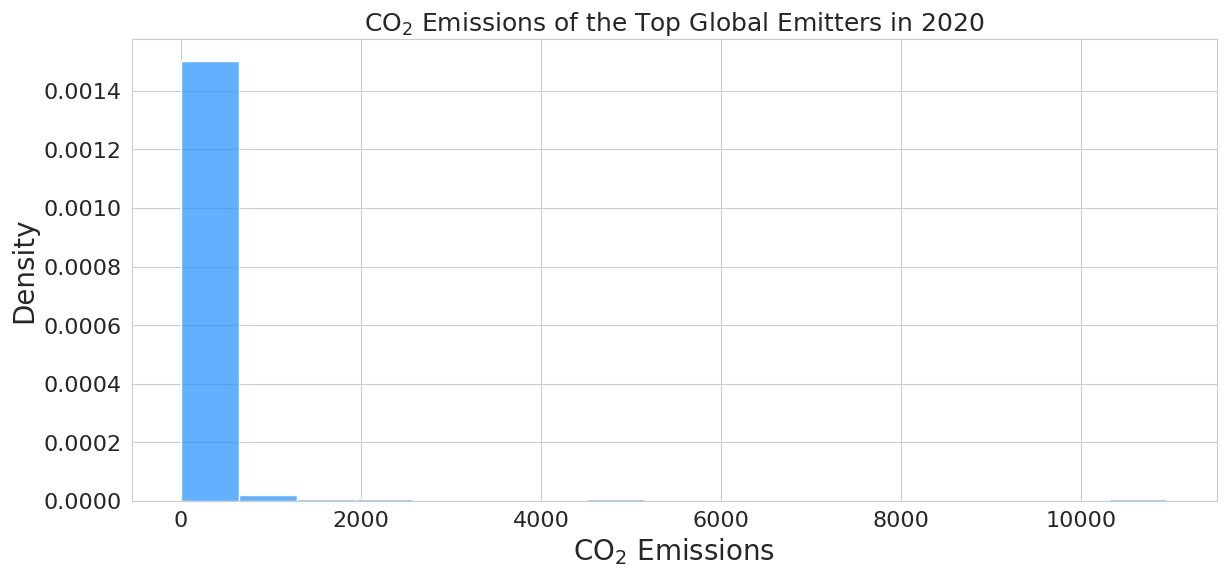

In [41]:
plt.figure(figsize = (14,6))
sns.histplot(data = df_select[df_select['year'] == 2020], x = 'co2', bins = 17, color = 'dodgerblue', alpha = 0.7, stat = 'density')
plt.ylabel('Density',fontsize = 20)
plt.xlabel('CO$_2$ Emissions',fontsize = 20)
plt.title('CO$_2$ Emissions of the Top Global Emitters in 2020',fontsize = 18)
plt.tick_params(labelsize = 16);

*From the histogram, we can see a major positive skew as the tail of the data reaches out to the 11000 value. This demonstrates how the large majority of CO$_2$ emissions occur in small increments while outliers like China produce massive portions of the emissions.*

##### $\rightarrow$ Make a boxplot of total CO$_2$ emissions in 2020. Add a strip plot on top of the boxplot.

*The functions below go through how to make a boxplot as well as a strip plot. The box plot is a color of dodgerblue and will sit behind the orange strip plot. Data was selected to be in the year 2020, and arranged with an x-axis of CO$_2$ Emissions.*

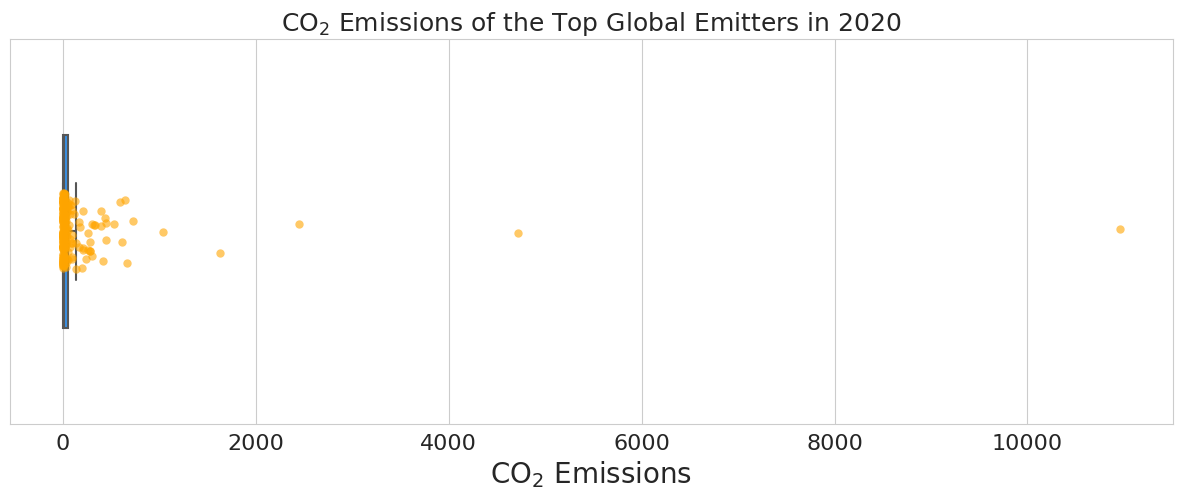

In [42]:
plt.figure(figsize = (15,5))

sns.boxplot(data = df_select[df_select['year'] == 2020], x = 'co2', color = 'dodgerblue', width = 0.5, fliersize = 0)

sns.stripplot(data = df_select[df_select['year'] == 2020], x = 'co2', color = 'orange', size = 6, alpha = 0.6)

plt.xlabel('CO$_2$ Emissions', fontsize = 20)
plt.title('CO$_2$ Emissions of the Top Global Emitters in 2020',fontsize = 18)
plt.tick_params(labelsize = 16)

*From the box plot and the strip plot alike, it can be seen that the bulk of data points lie near a value of 0. Each large value is an outlier. If one were to take the median of this data, it would be much lower than the mean, as understood through this diagram.*

##### $\rightarrow$ Are the CO$_2$ emissions of the top 10 emitters in 2020 outliers in the distribution?

*By looking at this graph, it seems that China and USA are both major outliers, while the rest become closer to the majority of the data but could still be considered minor outliers.*

## Emission trend over time

##### $\rightarrow$ Is the data set missing any CO$_2$ emission values for the top 10 emitters in 2020 over the years 1971 to 2020?

*This code includes the definition of df_topten as well as df_toptenyear. These new datasets seperate the data first into the top emitters in the year 2020, and then into what those emitters data stated betweeen 1971 and 2020. The info command will detail the amount of data points in each category.*

In [43]:
df_topten = df_select[df_select['country'].isin(['China','United States', 'Russia', 'India', 'Japan', 'Iran', 'Saudi Arabia', 'Germany', 'Indonesia', 'South Korea'])]
df_toptenyear = df_topten[df_topten['year'].between(1971,2020)]
df_toptenyear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 8940 to 44221
Data columns (total 74 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    500 non-null    object 
 1   year                                       500 non-null    int64  
 2   iso_code                                   500 non-null    object 
 3   population                                 500 non-null    float64
 4   gdp                                        480 non-null    float64
 5   cement_co2                                 500 non-null    float64
 6   cement_co2_per_capita                      500 non-null    float64
 7   co2                                        500 non-null    float64
 8   co2_growth_abs                             500 non-null    float64
 9   co2_growth_prct                            500 non-null    float64
 10  co2_including_luc    

*After detailing the information of the top ten emitters between 1971 and 2020, it is clear that there are no nations missing data. The amount of country points is 500, as there are 10 countries as top emitters spanning 50 years. The CO$_2$ value reflects this, as the number 500 explains that each country had a data value between the years 1971 and 2020, therefore there are no missing values.*

##### $\rightarrow$ Plot the time plot of the total CO$_2$ emissions from 1971 to 2020 for the top 10 emitters in 2020.

*The function below seperates the top ten emitters found earlier and plots them using the Seaborn function, lineplot. Each country is represented by its own seperate line, as shown in the table.*

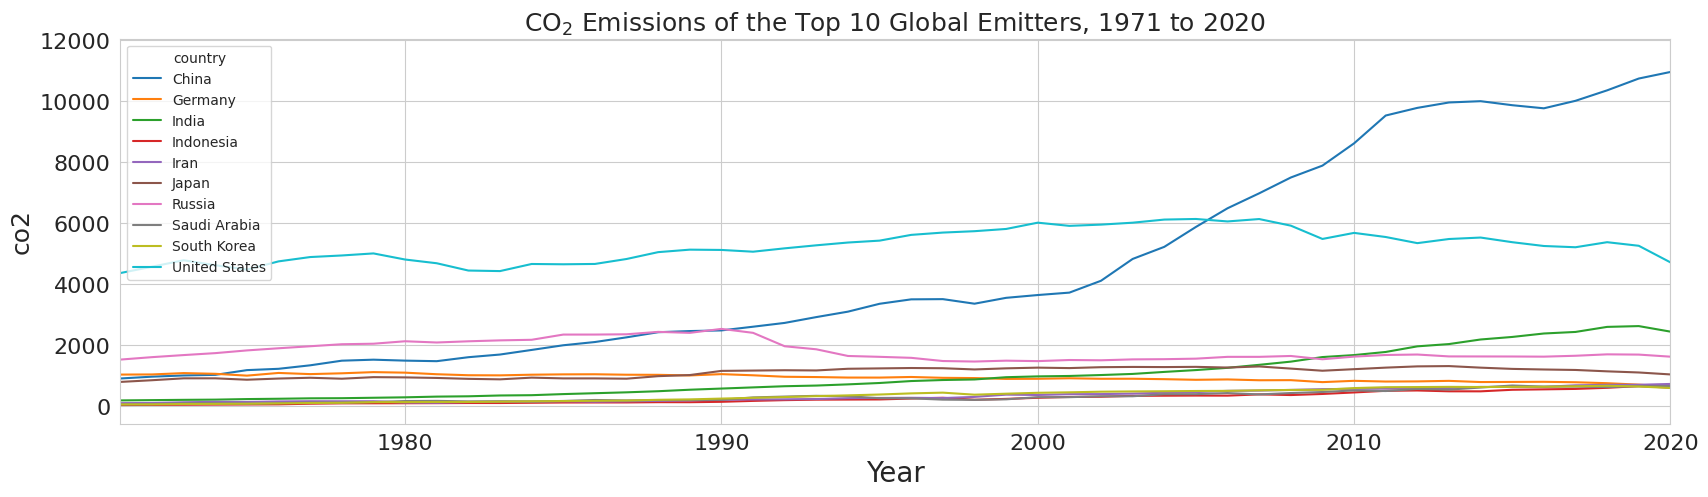

In [44]:
plt.figure(figsize=(20,5))
sns.lineplot(data = df[df['country'].isin(['China','United States', 'Russia', 'India', 'Japan', 'Iran', 'Saudi Arabia', 'Germany', 'Indonesia', 'South Korea'])], x='year', y='co2', hue='country')
plt.xlabel('Year', fontsize = 20)
plt.ylabel('co2', fontsize = 18)
plt.xlim(1971,2020)
plt.title('CO$_2$ Emissions of the Top 10 Global Emitters, 1971 to 2020',fontsize = 18)
plt.tick_params(labelsize = 16)

*From the time plot above, one can see how the emissions in places like China have skyrocketed in the last two decades, while most other countries have remained steady since 1971. The United States and China both outreach other country's emission values by at least double.*

##### $\rightarrow$ Again, plot the time plot of the total CO$_2$ emissions from 1971 to 2020 for the top 10 emitters in 2020, but now also include a plot of the mean total CO$_2$ emissions over all countries on the same plot.

*This plot is identical to the last except for the second lineplot command which will graph a black, dotted line representing the mean co2 emissions of all countries in the dataset from 1971 to 2020.*

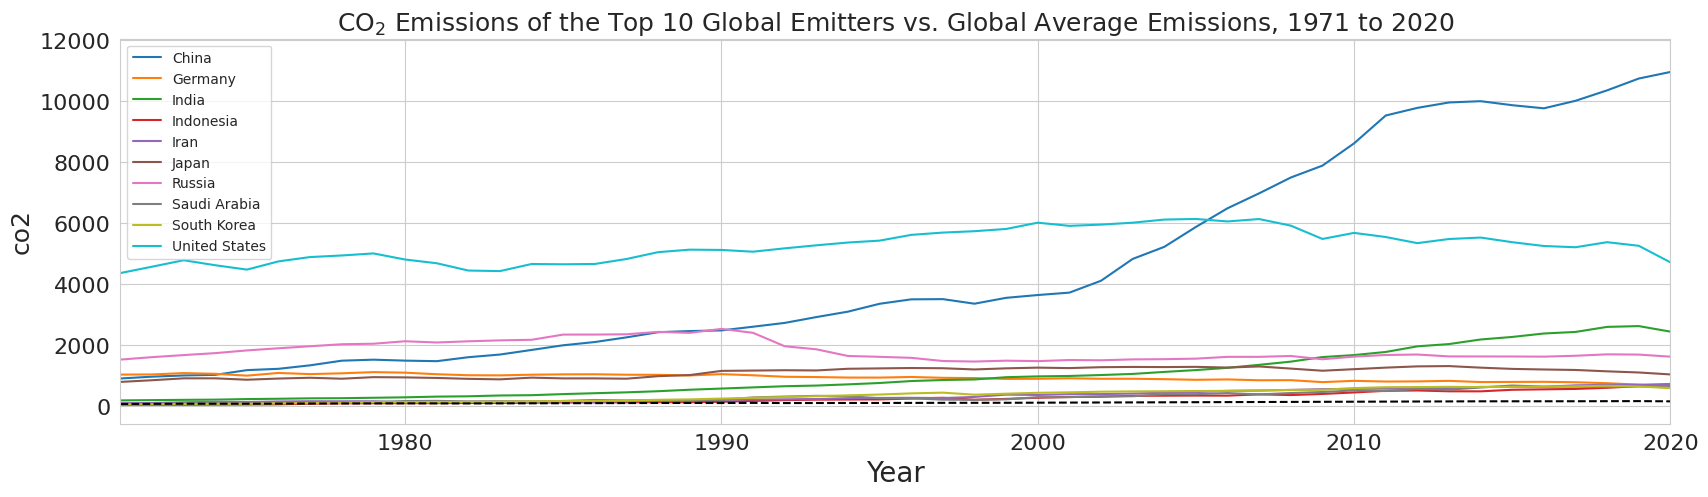

In [45]:
plt.figure(figsize=(20,5))
sns.lineplot(data = df[df['country'].isin(['China','United States', 'Russia', 'India', 'Japan', 'Iran', 'Saudi Arabia', 'Germany', 'Indonesia', 'South Korea'])], x='year', y='co2', hue='country')
sns.lineplot(data = df_select[['year','co2']].groupby('year').mean(), x='year', y='co2', color = 'k', linestyle='--')
plt.xlabel('Year', fontsize = 20)
plt.ylabel('co2', fontsize = 18)
plt.xlim(1971,2020)
plt.title('CO$_2$ Emissions of the Top 10 Global Emitters vs. Global Average Emissions, 1971 to 2020',fontsize = 18)
plt.tick_params(labelsize = 16);

*By looking at the black dotted line, one can see that the average emissions per country are still much lower than the yearly average of the top ten emitters above. The black line falls below all of these emitters beginning in around 1990.*

##### $\rightarrow$ Given the large difference between the smallest and largest values, it can help to plot the results on a log scale. Produce the plot of the top 10 emitters and the mean with CO$_2$ emissions on a log scale.

*The code below will plot the same graph as prior, plotting the top ten emitters and the average emissions from 1971 to 2020. The only difference in this data is the log scale on the y-axis.*

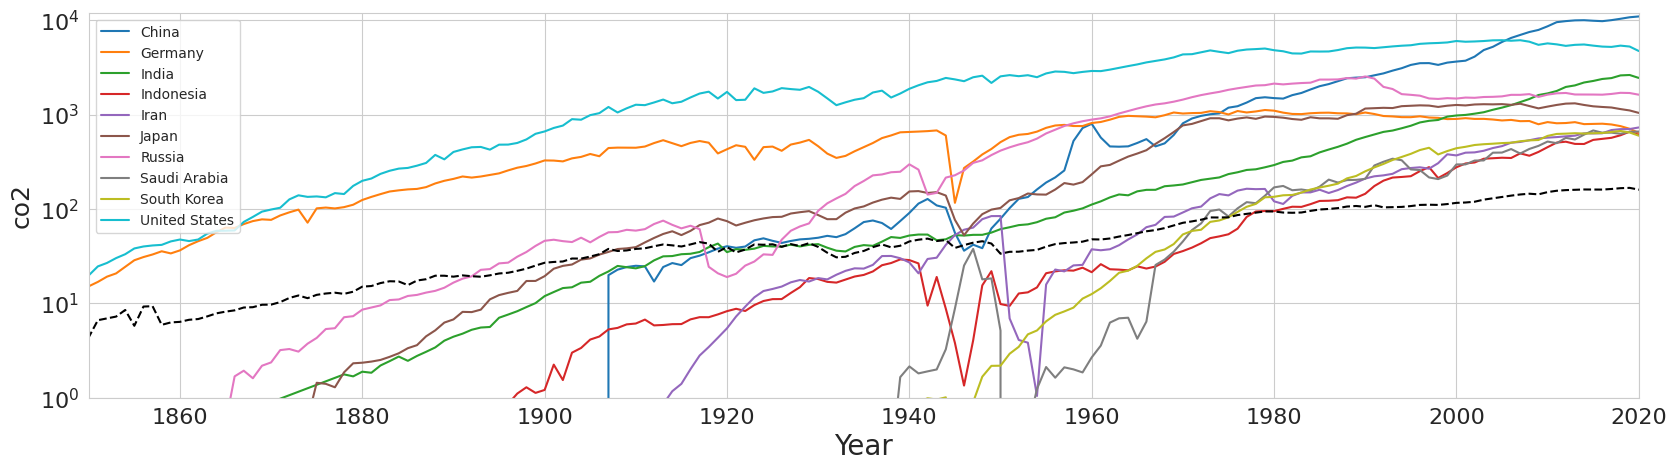

In [46]:
plt.figure(figsize=(20,5))
sns.lineplot(data = df[df['country'].isin(['China','United States', 'Russia', 'India', 'Japan', 'Iran', 'Saudi Arabia', 'Germany', 'Indonesia', 'South Korea'])], x='year', y='co2', hue='country')
sns.lineplot(data = df_select[['year','co2']].groupby('year').mean(), x='year', y='co2', color = 'k', linestyle='--')
plt.xlabel('Year', fontsize = 20)
plt.ylabel('co2', fontsize = 18)
plt.tick_params(labelsize = 16)
plt.xlim(1850,2020)
plt.ylim(1,12000)
plt.yscale('log')

*The added log scale in this plot allows for analysis of certain years to be made. It is interesting to note how, for example, China in around 1910 had a large increase in CO$_2$ emissions. This was most likely due to new technological advancements prior to World War I. Along with this, during the 1940s major changes occured in coutnries like Japan, Germany, and Indonesia, again possibly due to World War II and the rapid changes in data. Using a log scale allows for a different view of similar data in analysis.*

##### $\rightarrow$ Comment on the trend in CO$_2$ emissions from these countries over the last 50 years.

*Overall, it can be seen that countries across the globe are having increase in CO$_2$ emissions. The box plot, strip plot, and histogram demonstrate how certain countries, like China, are the highest producers of CO$_2$. The line plots demonstrate how each country, not only China, have grown in emissions since 1971, and how they are set to continue growing in the future.*